## Infectious Disease in Nigeria

### Introduction
Infectious diseases continue to be one of the major public health challenges in Nigeria, affecting people across all age groups and regions. The dataset used in this project contains detailed records of various reportable diseases collected from different states and settlements across the country. It includes demographic information, disease types, serotype classifications, health outcomes, and other key factors that can help describe patterns of disease spread and impact.

By analyzing this data, we can gain valuable insights into how different diseases affect specific populations, identify areas with higher disease occurrence, and explore factors such as age, gender, and settlement type that may influence infection or recovery rates. The findings can contribute to better understanding of disease dynamics and support health authorities in planning effective response strategies.

- **The aim of this project is to analyze patterns and trends in reported infectious disease cases across Nigeria, exploring demographic and clinical factors that influence disease occurrence and outcomes.**

### Outline

1. [Introduction](#introduction)
2. [Reading Dataset](#reading-dataset)
3. [Data Glossary](#data-glossary)
4. [Value Counts of the Infectious Diseases](#Value-Counts-of-the-Infectious-Diseases)
5. [Correlation Between Settlement and Diseases](#Correlation-Between-Settlement-and-Diseases)
6. [Data Visualization](#Data-Visualization)
   - [Age Group Distribution](#Age-Group-Distribution)
   - [Age Group Distribution-Summary-of-Findings](#Age-Group-Distribution-Summary-of-Findings)
   - [Data Visualization by State](#Data-Visualization-by-State)
   - [Data Visualization by State: Summary of Findings](#Data-Visualization-by-State:-Summary-of-Findings)
   - [Data Visualization by Settlement](#Data-Visualization-by-Settlement)
   - [Data Visualization by Settlement: Summary of Findings](#Data-Visualization-by-Settlement:-Summary-of-Findings)
   - [Data Visualization by Year](#Data-Visualization-by-Year)
   - [Data Visualization by Year: Summary of Findings](#Data-Visualization-by-Year:-Summary-of-Findings)
   - [Data Visualization by Diseases](#Data-Visualization-by-Diseases)
   - [Data Visualization by Diseases: Summary of Findings](#Data-Visualization-by-Diseases:-Summary-of-Findings)
   - [Distribution by Year](#Data-Visualization-by-Year)
   - [Distribution by Year: Summary of Findings](#Data-Visualization-by-Year-Summary-of-Findings)
   - 
   - [ Number of Patients and Age Distribution](#Number-of-Patients-and-Age-Distribution)
   - [ Number of Patients and Age Distributions: Summary of Findings](# Number-of-Patients-and-Age-Distribution:-Summary-of-Findings)
   - [Serotype Distribution](#Serotype-Distribution)
   - [Serotype Distribution:Summary of Findings](#Serotype-Distribution:-Summary-of-Findings)
7. [Conclusion](#conclusion)
8. [Recommendation and Next Steps](#recommebdation-and-next-steps)
   

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


### Reading Dataset

In [2]:
# Reading data
infectious_data = pd.read_csv('meningitis_dataset.csv')

In [3]:
infectious_data.head(10)

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1
5,6,Yakubu,Janet,Chioma,Female,0,1,Kaduna,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
6,7,Razak,Adaugo,Adaobi,Female,0,1,Taraba,Rural,1,...,0,0,1,Alive,1,0,Confirmed,0,1,1
7,8,Annakyi,Danmbazzu,Osagie,Male,1,0,Katsina,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
8,9,Adejoro,Iyin,Osatimehin,Male,1,0,Katsina,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
9,10,Okorie,Adaugo,Chika,Female,0,1,Osun,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [4]:
infectious_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   id                          284484 non-null  int64 
 1   surname                     284484 non-null  object
 2   firstname                   284484 non-null  object
 3   middlename                  284484 non-null  object
 4   gender                      284484 non-null  object
 5   gender_male                 284484 non-null  int64 
 6   gender_female               284484 non-null  int64 
 7   state                       284484 non-null  object
 8   settlement                  284484 non-null  object
 9   rural_settlement            284484 non-null  int64 
 10  urban_settlement            284484 non-null  int64 
 11  report_date                 284484 non-null  object
 12  report_year                 284484 non-null  int64 
 13  age                         2

### Data Glossary

1.  **id** – Unique identifier for each patient record.
2.  **surname** – Patient’s last name.
3.  **firstname** – Patient’s first name.
4.  **middlename** – Patient’s middle name.
5.  **gender** – Recorded gender of the patient.
6.  **gender_male** – Binary indicator for male gender.
7.  **gender_female** – Binary indicator for female gender.
8.  **state** – Nigerian state where the case was reported.
9.  **settlement** – Type of settlement (urban or rural).
10.  **rural_settlement** – Binary indicator for rural area.
11.  **urban_settlement** – Binary indicator for urban area.
12.  **report_date** – Date when the case was reported.
13.  **report_year** – Year of report.
14.  **age** – Age of the patient in years.
15.  **age_str** – Age in descriptive format.
16.  **date_of_birth** – Date of birth of the patient.
17.  **child_group** – Binary indicator for child age group.
18.  **adult_group** – Binary indicator for adult age group.
19.  **disease** – Primary reported disease for the case.
20.  **cholera** – Binary indicator for cholera cases.
21.  **diarrhoea** – Binary indicator for diarrhoea cases.
22.  **measles** – Binary indicator for measles cases.
23.  **viral_haemmorrhaphic_fever** – Binary indicator for viral hemorrhagic fever cases.
24.  **meningitis** – Binary indicator for meningitis cases.
25.  **ebola** – Binary indicator for Ebola virus cases.
26.  **marburg_virus** – Binary indicator for Marburg virus cases.
27.  **yellow_fever** – Binary indicator for yellow fever cases.
28.  **rubella_mars** – Binary indicator for rubella or MARS cases.
29.  **malaria** – Binary indicator for malaria cases.
30.  **serotype** – Reported meningitis strain or serogroup.
31.  **NmA** – Binary indicator for Neisseria meningitidis serogroup A.
32.  **NmC** – Binary indicator for serogroup C.
33.  **NmW** – Binary indicator for serogroup W.
34.  **health_status** – Recorded outcome of the patient.
35.  **alive **– Binary indicator if the patient survived.
36.  **dead** – Binary indicator if the patient died.
37.  **report_outcome** – Report classification (confirmed or not confirmed).
38.  **unconfirmed** – Binary indicator for unconfirmed cases.
39.  **confirmed** – Binary indicator for confirmed cases.
40.  **null_serotype** – Binary indicator for untyped or unknown serogroup.


### Value Counts of the Infectious Diseases

In [5]:
# Display the list of diseases in the dataframe
infectious_data.disease.value_counts()

Cholera                       28589
Diarrhoea                     28550
Rubella Mars                  28539
Malaria                       28535
Measles                       28471
Marburg Virus                 28430
Yellow Fever                  28428
Viral Haemmorrhaphic Fever    28401
Meningitis                    28362
Ebola                         28179
Name: disease, dtype: int64

The data shows that **cholera** is the most frequently reported disease, followed closely by **diarrhoea, rubella, and malaria**. Measles, marburg virus, yellow fever, and viral haemorrhagic fever also appear often, while meningitis and ebola are reported slightly less frequently. Overall, the dataset highlights **cholera and diarrhoea** as the most common infections, with **ebola** being the least reported among the listed diseases.

### Correlation Between Settlement and Diseases

In [6]:
settlementt = ['rural_settlement', 'urban_settlement']
diseases = ['cholera', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria']
corr = infectious_data[settlementt + diseases].corr()
print(corr)

                            rural_settlement  urban_settlement   cholera  \
rural_settlement                    1.000000         -1.000000 -0.000462   
urban_settlement                   -1.000000          1.000000  0.000462   
cholera                            -0.000462          0.000462  1.000000   
diarrhoea                          -0.000590          0.000590 -0.111637   
measles                            -0.000202          0.000202 -0.111465   
viral_haemmorrhaphic_fever         -0.001232          0.001232 -0.111313   
meningitis                         -0.000376          0.000376 -0.111228   
ebola                               0.000934         -0.000934 -0.110829   
marburg_virus                      -0.000658          0.000658 -0.111376   
yellow_fever                        0.001663         -0.001663 -0.111372   
rubella_mars                        0.003166         -0.003166 -0.111613   
malaria                            -0.002240          0.002240 -0.111604   

           

The correlation matrix shows that rural and urban settlements are perfectly negatively correlated, meaning an area classified as rural cannot be urban and vice versa. The relationships between settlements and the various diseases are extremely weak, suggesting that settlement type has almost no direct association with disease occurrence. Among the diseases, there is a consistent, moderate negative correlation (around -0.11) across most pairs, indicating that as cases of one disease increase slightly, others tend to decrease marginally. Overall, the data suggest minimal interdependence between settlement types and disease prevalence, with only weak associations among the diseases themselves.

## Data Visualization

### Age Group Distribution

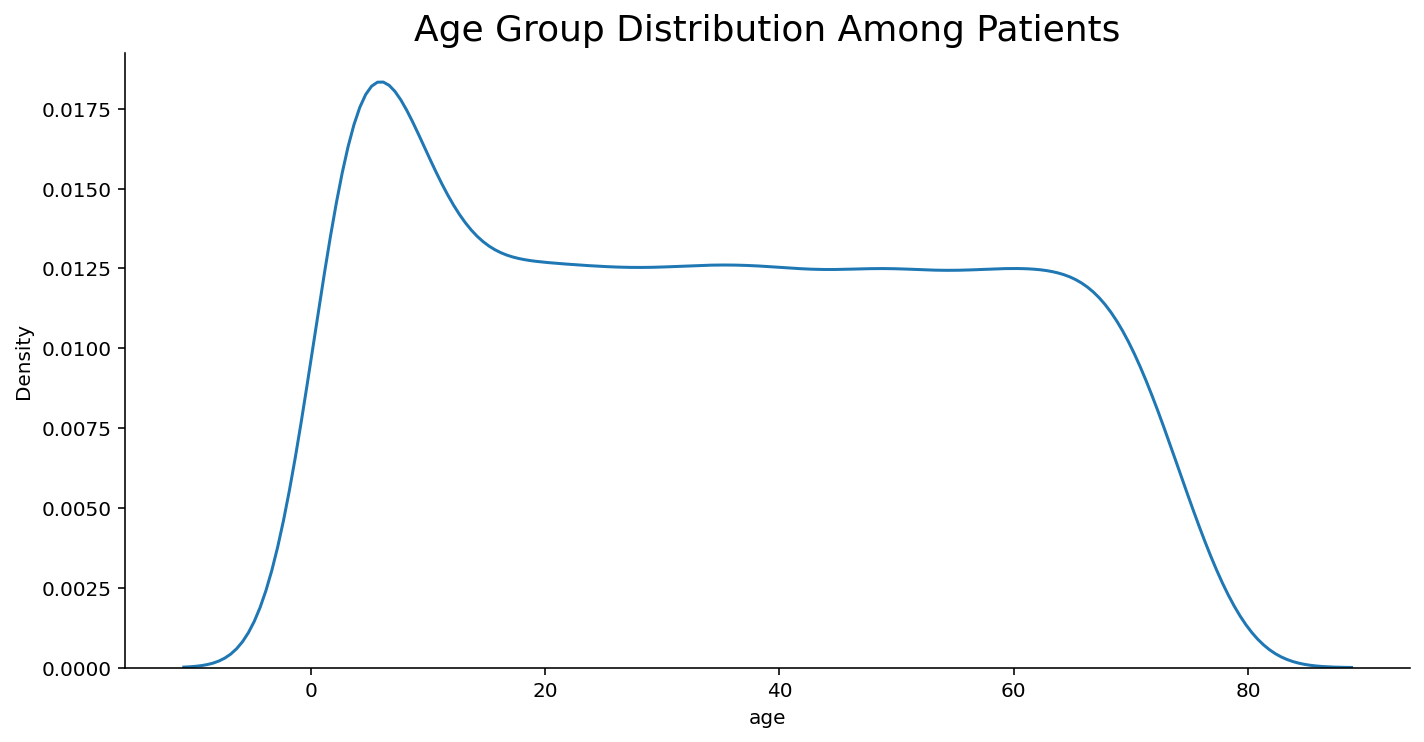

In [7]:
sns.displot(infectious_data, x='age', kind="kde", bw_adjust=2, aspect= 2)
plt.title('Age Group Distribution Among Patients', fontsize= 18)
plt.show()

The distribution plot shows that the peak was the younger age group around age 12 and the older age group had more even distribtion.

### Data Visualization By State 

In [8]:
infectious_data_state = (
    infectious_data.groupby('state')['id']
    .count()
    .reset_index(name='Total_Number_of_Patients')
    .sort_values(by='Total_Number_of_Patients', ascending=False)
)
infectious_data_state

,state,Total_Number_of_Patients
26,Niger,7842
28,Ondo,7835
19,Kano,7822
5,Bayelsa,7797
16,Imo,7783
6,Benue,7776
21,Kebbi,7764
35,Yobe,7760
18,Kaduna,7754
10,Ebonyi,7747


In [9]:
# Top fifteen states with the highest number of patients
top_states_by_patients =infectious_data_state.head(15)
top_states_by_patients

,state,Total_Number_of_Patients
26,Niger,7842
28,Ondo,7835
19,Kano,7822
5,Bayelsa,7797
16,Imo,7783
6,Benue,7776
21,Kebbi,7764
35,Yobe,7760
18,Kaduna,7754
10,Ebonyi,7747


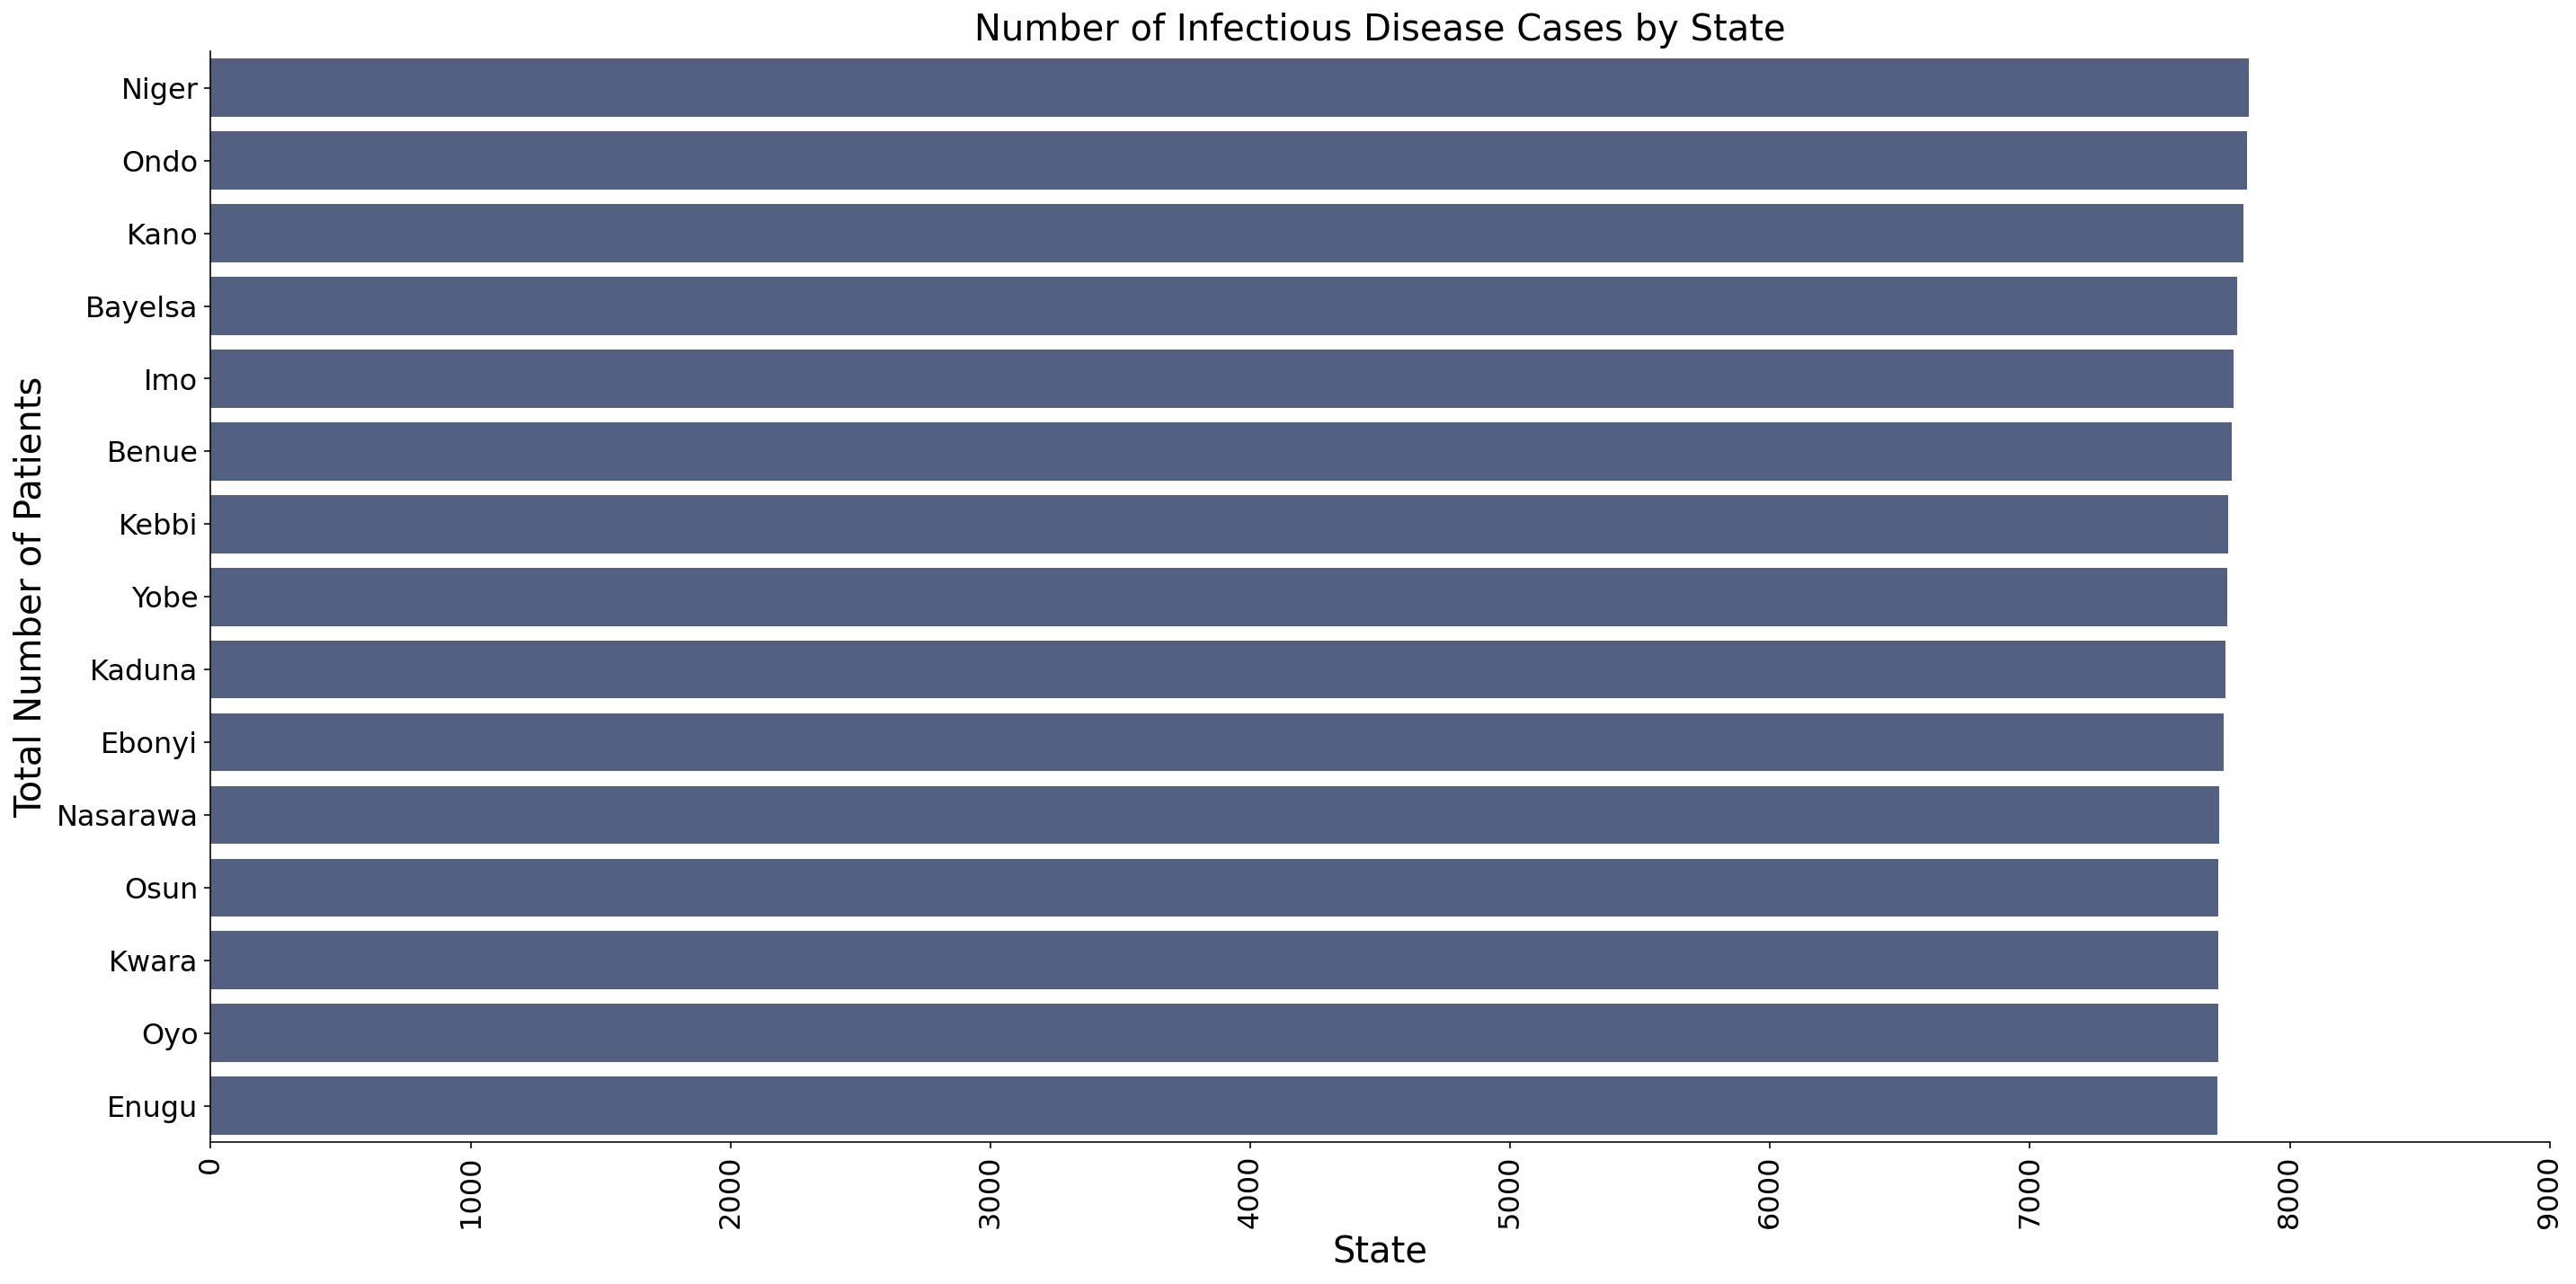

In [20]:
plt_top_states = sns.catplot(data= top_states_by_patients, x= 'Total_Number_of_Patients' , y='state', color= '#4c5d8a', kind='bar', height= 10, aspect =2)

# Rotate x labels for readability
plt_top_states.set_xticklabels(rotation=90, fontsize= 16)
plt_top_states.set_yticklabels(fontsize= 16)

# Add better axis labels and title
plt_top_states.set_axis_labels("State", "Total Number of Patients", fontsize= 20)
plt.title("Number of Infectious Disease Cases by State", fontsize=20)

plt.tight_layout()
plt.show()

### Data Visualization by State: Summary of Findings

This chart illustrates the total number of infectious disease cases by state, and what stands out is how closely grouped the values are across all the states shown.

Each bar represents a state, and the bars are nearly identical in length, suggesting that the total number of patients is very similar from one state to another. There are no sharp peaks or outliers; no single state has a dramatically higher or lower number of cases.

This uniformity implies that infectious diseases are fairly evenly distributed among these states, rather than concentrated in a few locations. It might suggest comparable population sizes, healthcare reporting practices, or exposure levels across these regions.

In summary, the graph highlights a consistent spread of disease cases across the listed states, with no major disparities in the total number of reported patients.

### Data Visualization by Settlement

In [11]:
infectious_data_settlement= infectious_data.groupby(['settlement', 'disease', 'health_status'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
infectious_data_settlement

# px.bar(infectious_data_settlement, x= 'settlement' , y='Number of Patients', color= 'disease')

,settlement,disease,health_status,Number of Patients
16,Rural,Rubella Mars,Dead,7272
27,Urban,Malaria,Alive,7259
19,Rural,Yellow Fever,Alive,7207
4,Rural,Diarrhoea,Dead,7191
1,Rural,Cholera,Dead,7180
37,Urban,Viral Haemmorrhaphic Fever,Alive,7179
6,Rural,Ebola,Dead,7179
18,Rural,Viral Haemmorrhaphic Fever,Dead,7176
24,Urban,Diarrhoea,Dead,7170
15,Rural,Rubella Mars,Alive,7165


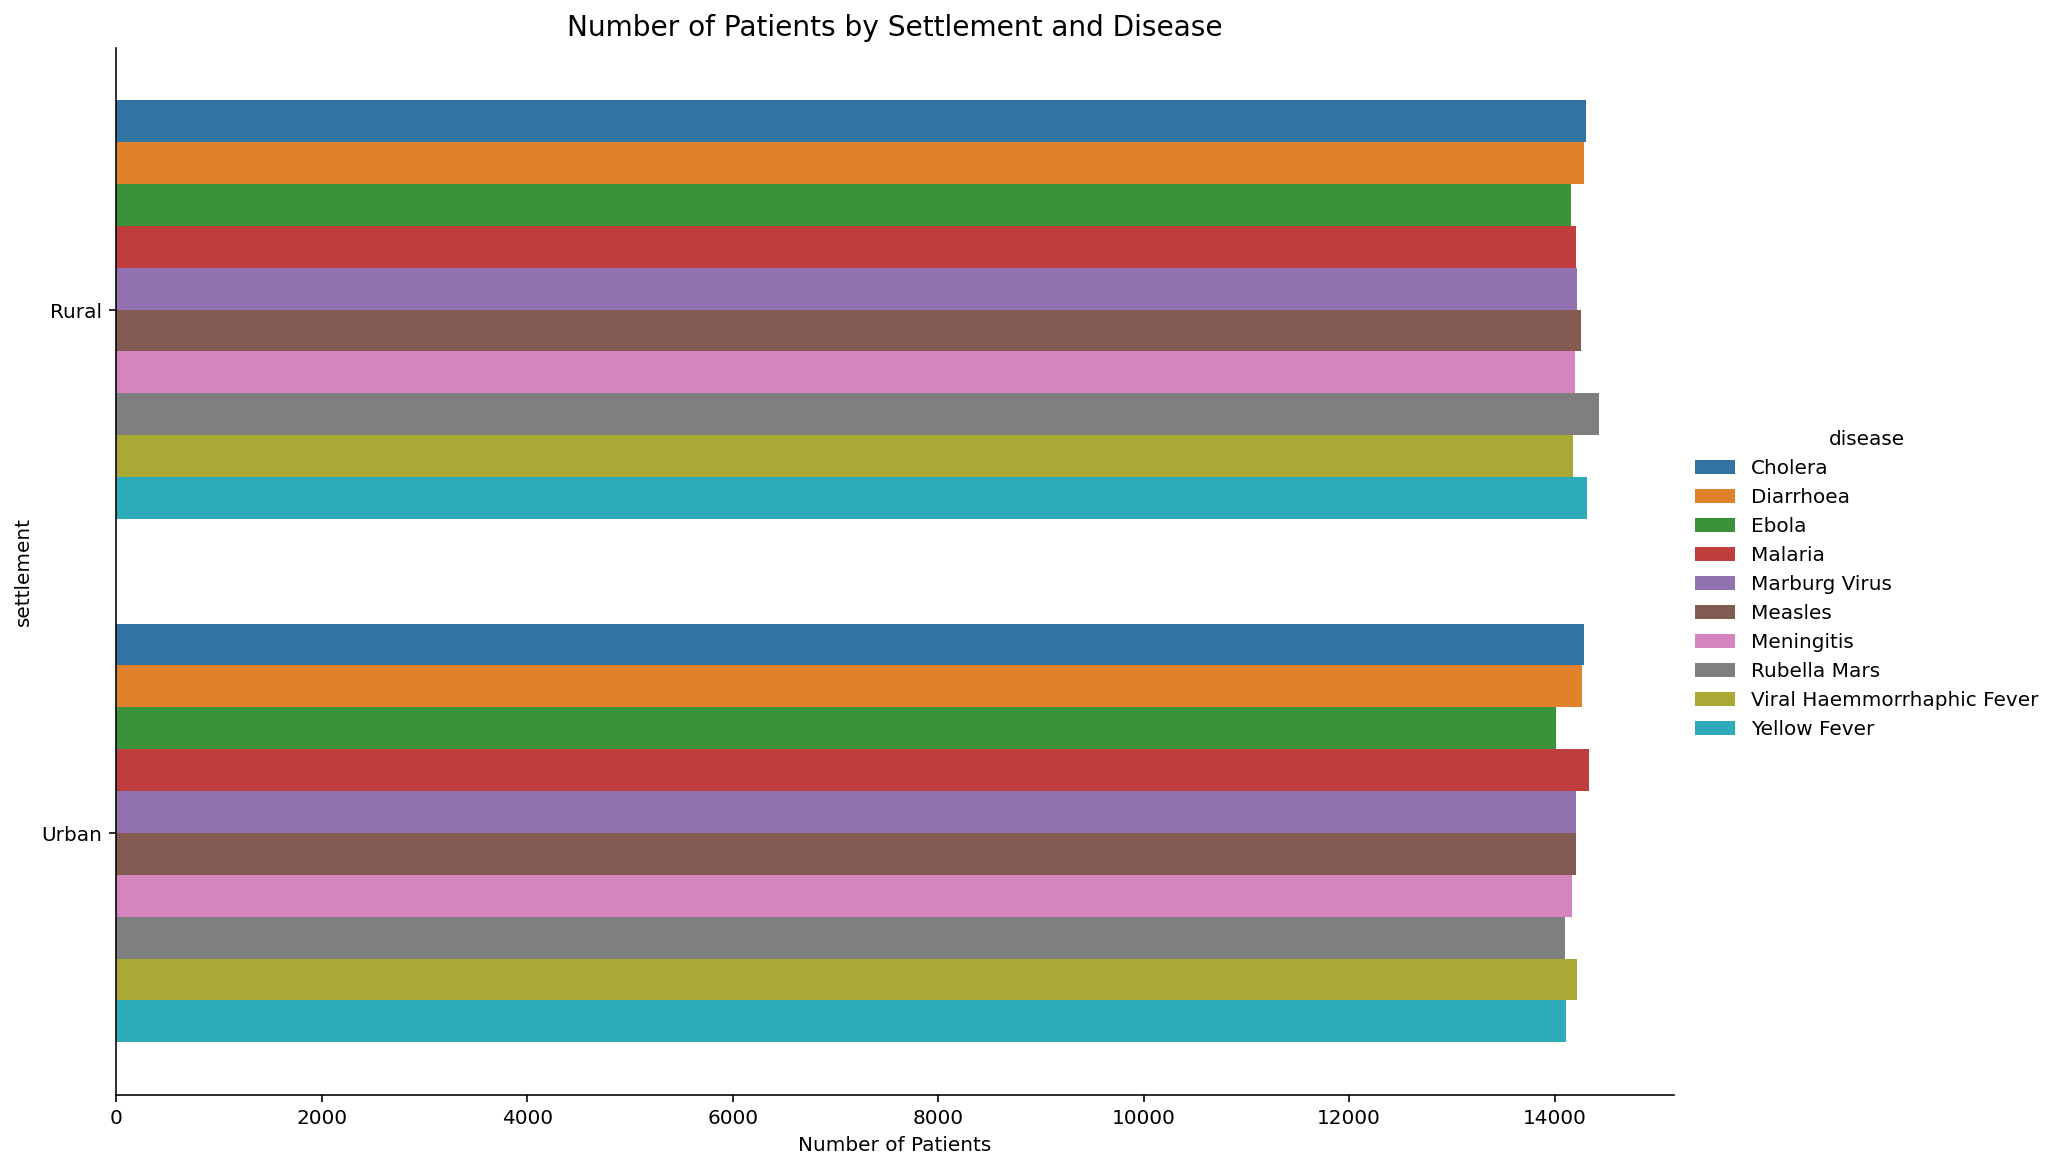

In [12]:
pivot = infectious_data_settlement.pivot_table(
    index='settlement',
    columns='disease',
    values='Number of Patients',
    aggfunc='sum',
    fill_value=0
)

pivot_long = pivot.reset_index().melt(id_vars='settlement', var_name='disease', value_name='Number of Patients')

sns.catplot(
    data=pivot_long,
    x='Number of Patients',
    y='settlement',
    hue='disease',
    kind='bar',
    height=8,
    aspect=1.5
)
plt.title('Number of Patients by Settlement and Disease', fontsize=14)
plt.show()

### Data Visualization by Settlement : Summary of Findings
Here, the data is grouped by settlement type (rural or urban), disease, and health status. The bar chart shows how diseases are distributed between rural and urban areas and how patient outcomes differ across those settings.
This view helps us see whether certain diseases are more common in rural communities or urban centers, and whether survival rates vary by location.

This chart shows the number of patients across different settlements, broken down by type of disease.

From the visualization, it’s clear that the distribution of diseases varies slightly between settlements.  The bar chart shows how diseases are distributed between rural and urban areas and how patient outcomes differ across those settings.
This view helps us see whether certain diseases are more common in rural communities or urban centers, and whether survival rates vary by location.

Overall, the graph provides a comparative view of how disease cases are spread geographically and by type, highlighting settlements that may need more focused public health attention or resources due to consistently higher case numbers.

### Data Visualization by Year

In [13]:
infectious_data_year= infectious_data.groupby(['state', 'report_year'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
infectious_data_year


,state,report_year,Number of Patients
264,Niger,2013,856
323,Rivers,2012,853
268,Niger,2017,837
330,Sokoto,2009,830
232,Kwara,2011,824
...,...,...,...
107,Ebonyi,2016,716
223,Kogi,2012,707
324,Rivers,2013,704
315,Plateau,2014,703


In [14]:
# Top twenty states affected per year
top_twenty_states_per_year = infectious_data_year.head(20)
top_twenty_states_per_year

,state,report_year,Number of Patients
264,Niger,2013,856
323,Rivers,2012,853
268,Niger,2017,837
330,Sokoto,2009,830
232,Kwara,2011,824
54,Bayelsa,2013,822
289,Ondo,2018,821
138,Enugu,2017,821
0,Abia,2009,821
231,Kwara,2010,817


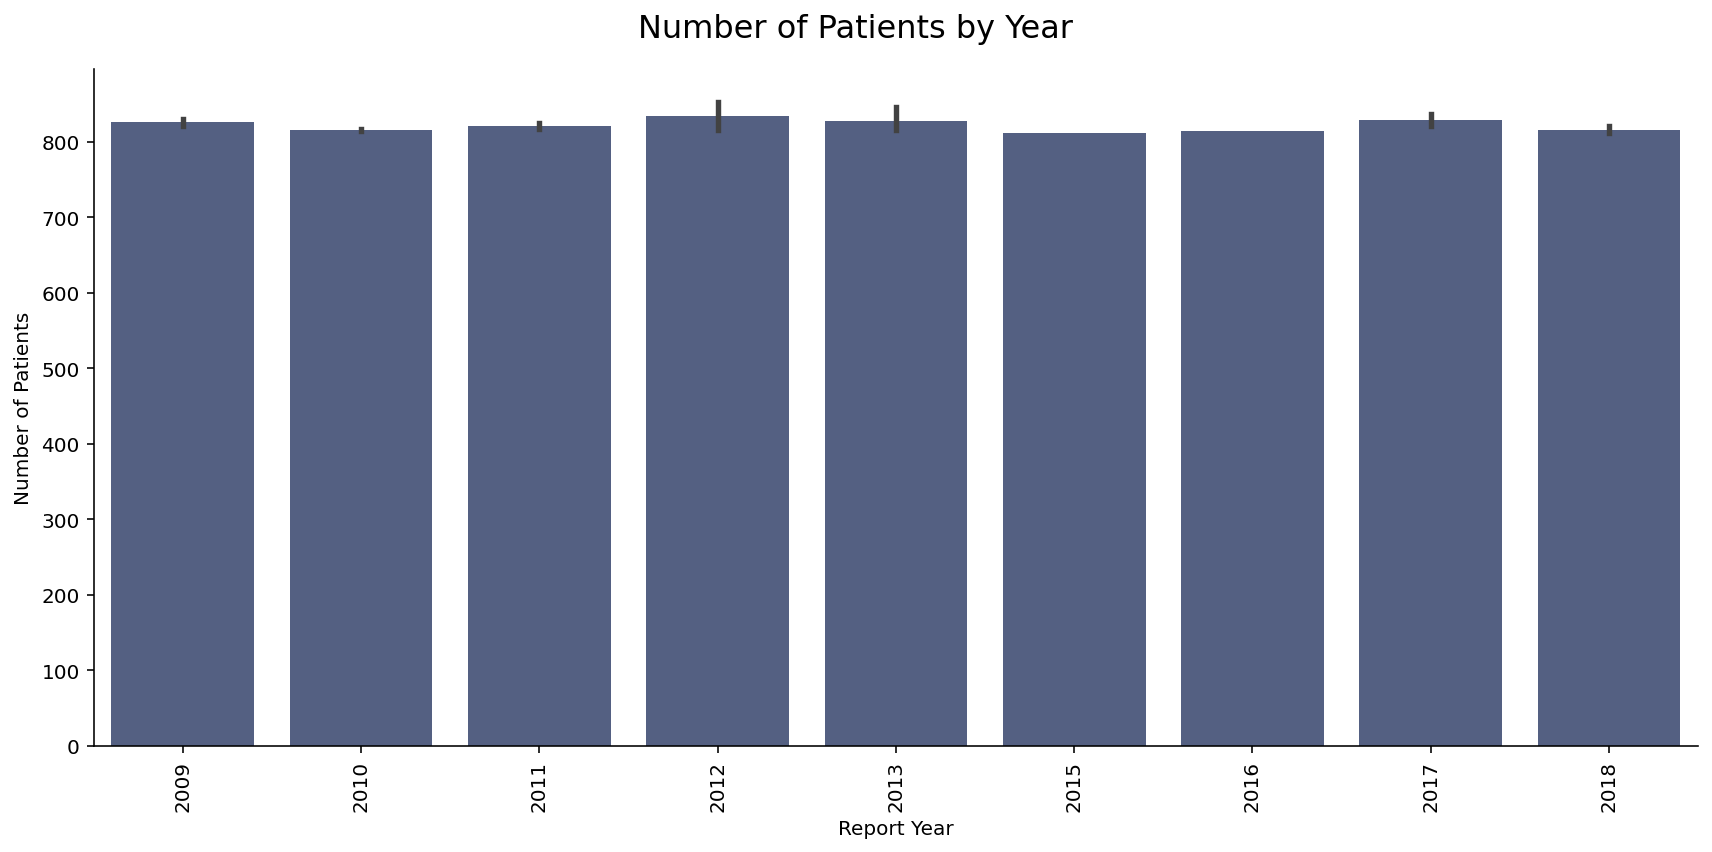

In [15]:
plt_top_states_per_year = sns.catplot(data=top_twenty_states_per_year , x= 'report_year' , y='Number of Patients', color= '#4c5d8a', kind= 'bar', height= 6, aspect =2)

# Rotate x labels for readability
plt_top_states_per_year.set_xticklabels(rotation=90)

# Add better axis labels and title
plt_top_states_per_year.set_axis_labels("Report Year", "Number of Patients")
plt_top_states_per_year.fig.suptitle("Number of Patients by Year", fontsize=16)

plt.tight_layout()
plt.show()

### Data Visualization by Year: Summary of Findings
This section groups reported number of patients cases per year and state, providing a view of how the number of patients reporting has changed over time.
The bar chart helps to visualize trends—whether the number of cases is increasing, decreasing, or fluctuating over the years—and which states contribute most to those changes. 

### Data Visualization by Diseases

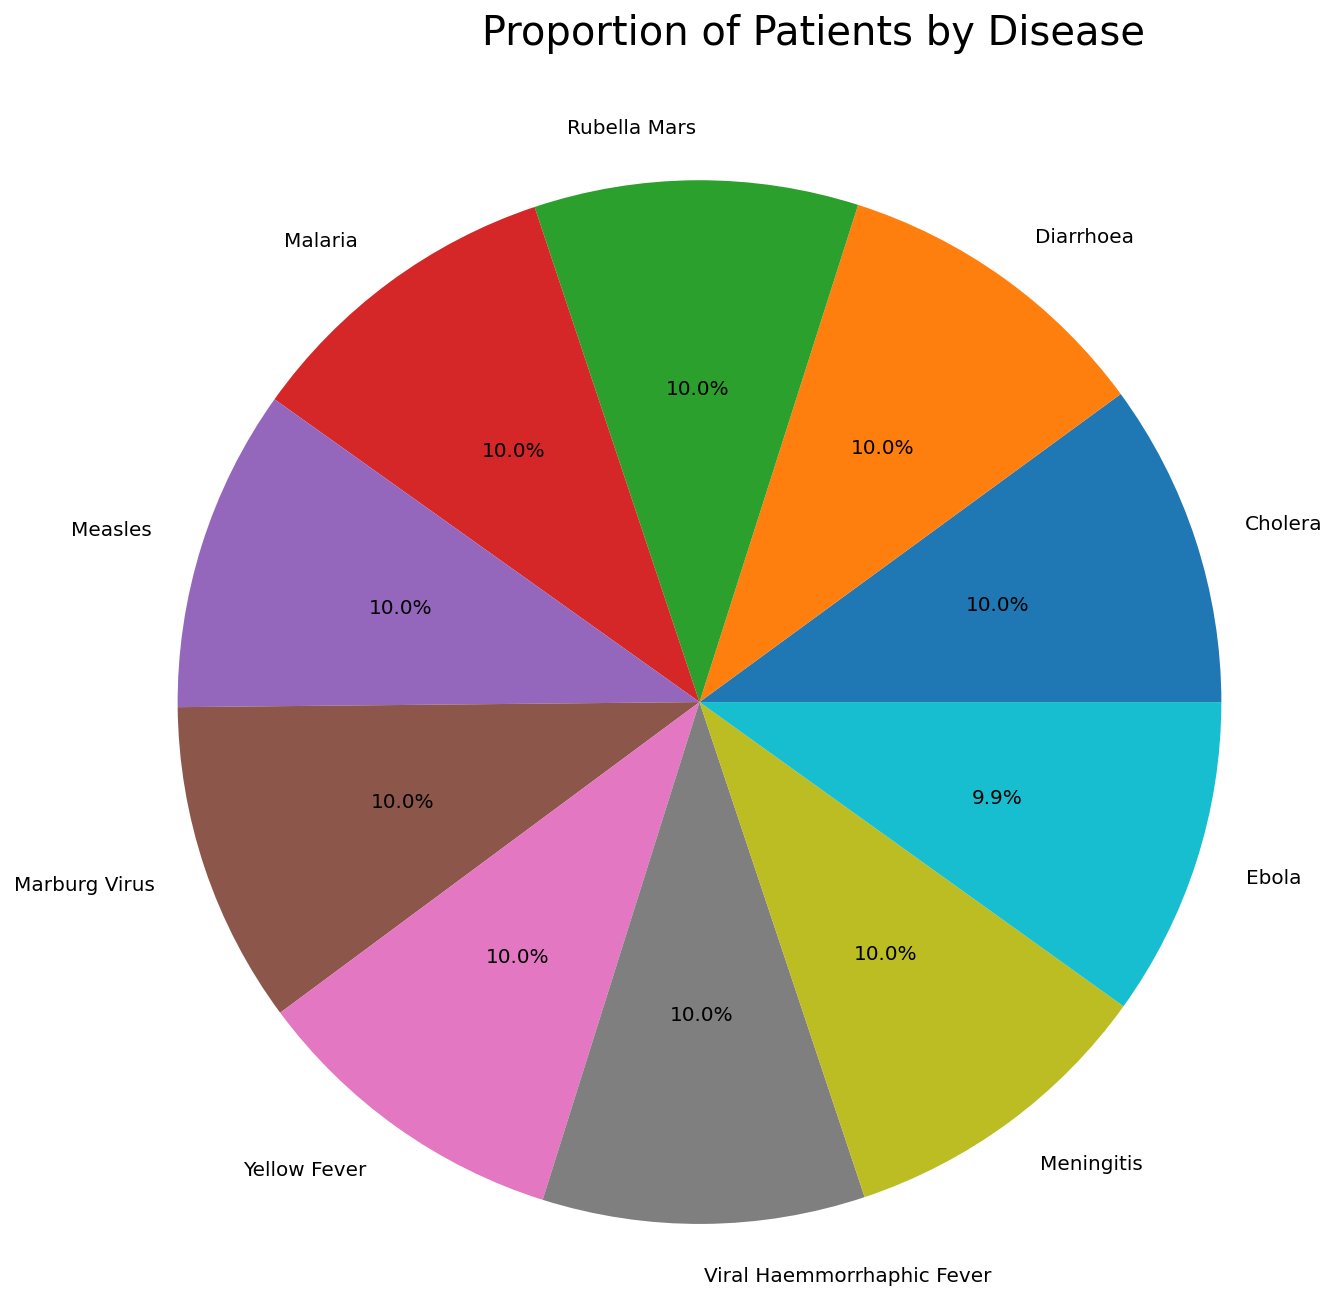

In [16]:
infectious_data_disease= infectious_data.groupby(['disease'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
infectious_data_state

plt.pie(
    infectious_data_disease['Number of Patients'],
    labels=infectious_data_disease['disease'],
    autopct='%1.1f%%',
    startangle=0,
    radius= 3
)
plt.title('Proportion of Patients by Disease', fontsize= 20, loc = 'left', pad= 220)
plt.show()

### Distribution of Diseases: Summary of Findings

This analysis looks at the total number of patients for each disease type. The pie chart provides a clear picture that the diseases are evenly distributed.

### Number of Patients and Age Distribution

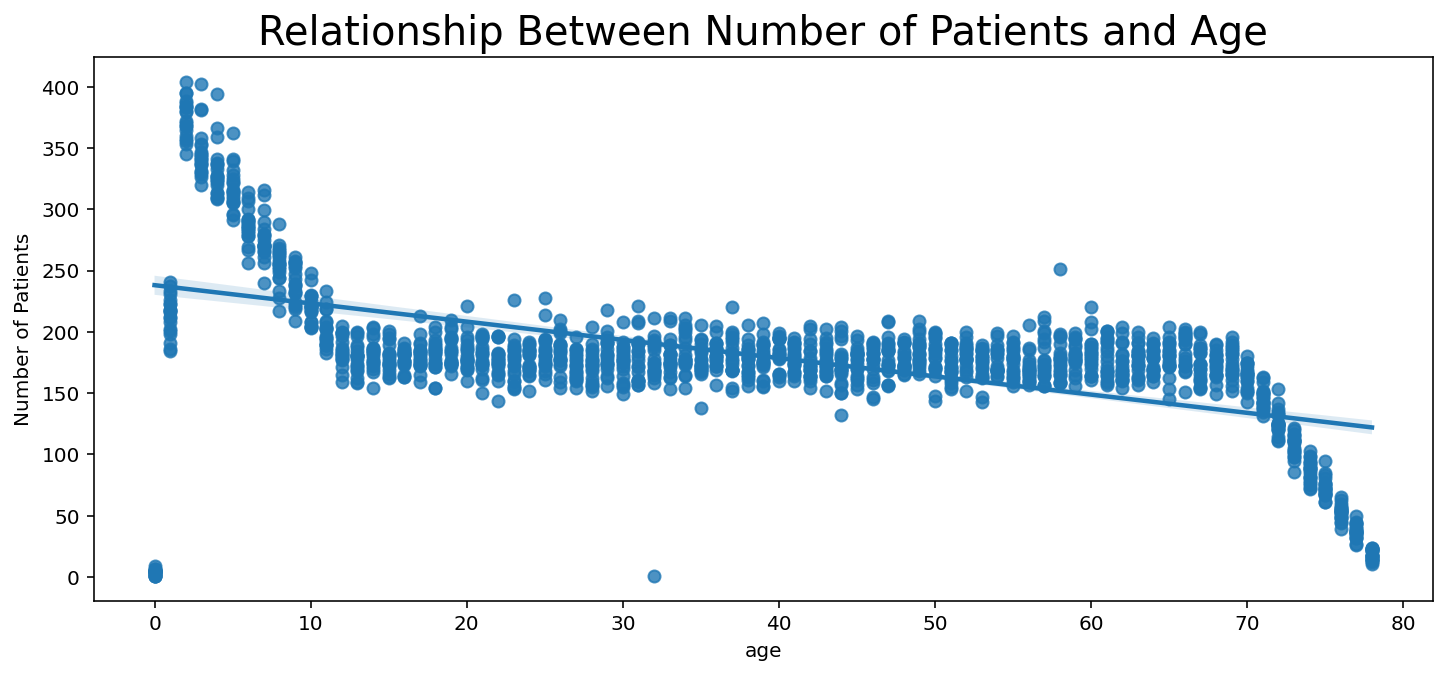

In [17]:
infectious_data_age = infectious_data.groupby(['age', 'disease', 'health_status'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
infectious_data_age

plt.figure(figsize=(12, 5))
sns.regplot(data= infectious_data_age, x= 'age' , y='Number of Patients')
plt.title('Relationship Between Number of Patients and Age', fontsize = 20)
plt.show()

### Number of Patients and Age Distribution: Summary of Findings
The graph shows an inverse relationship between age and the number of affected patients. Younger individuals appear to be more affected by the diseases compared to older age groups. This trend may be attributed to the fact that younger patients often have less developed or weaker immune systems, making them more susceptible to infections. Additionally, factors such as limited prior exposure to pathogens, nutritional status, and differences in hygiene practices could also contribute to the higher infection rates observed among younger patients.

### Serotype Distribution

In [18]:
infectious_data_serotype = (
    infectious_data[
        (infectious_data['serotype'].notna()) &
        (infectious_data['serotype'].str.lower() != 'null') &
        (infectious_data['null_serotype'] == 0)
    ]
    .groupby(['serotype', 'disease'])['id']
    .count()
    .reset_index(name='Number of Patients')
    .sort_values(by='Number of Patients', ascending=False)
)
infectious_data_serotype

,serotype,disease,Number of Patients
2,Neisseria meningitidis group W (NmW),Meningitis,14194
1,Neisseria meningitidis group C (NmC),Meningitis,7130
0,Neisseria meningitidis group A (NmA),Meningitis,7038


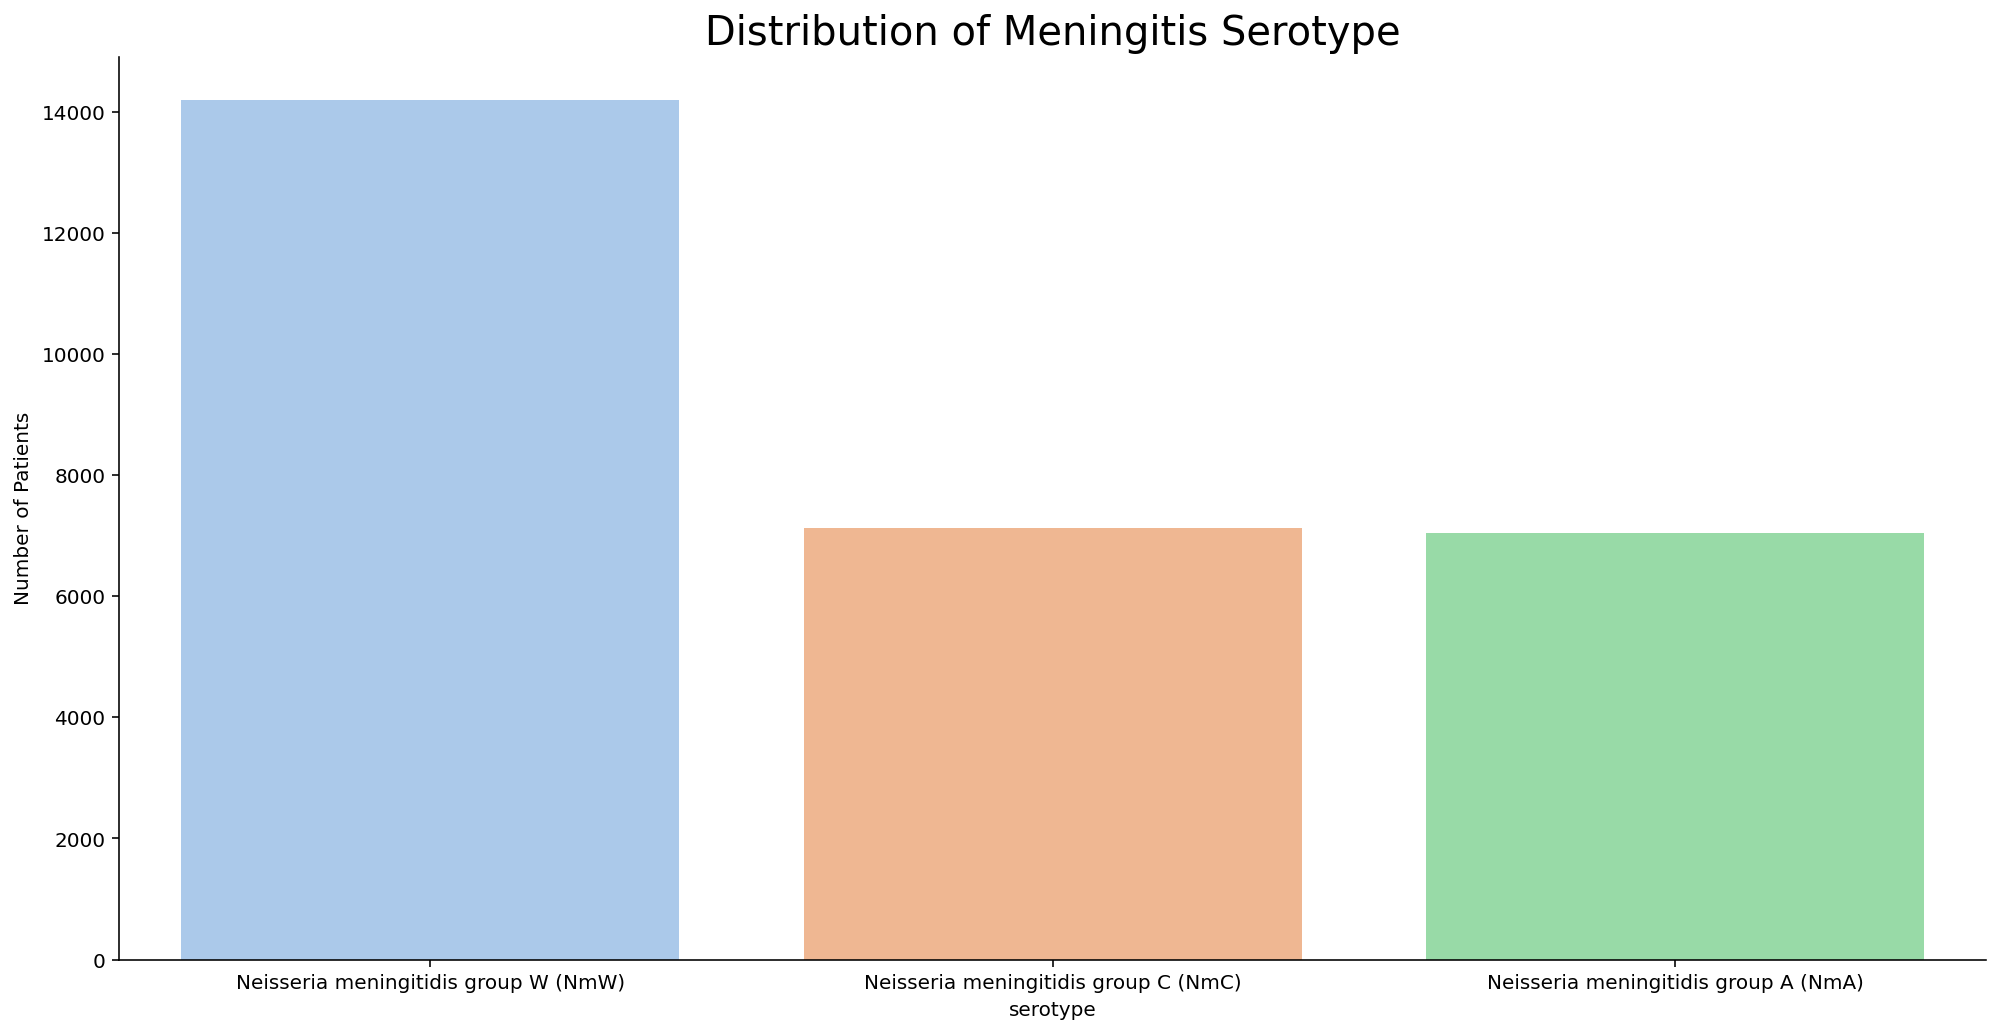

In [22]:
sns.catplot(data= infectious_data_serotype, x='serotype' , y='Number of Patients', palette= 'pastel', aspect= 2, height= 7, kind= 'bar')
plt.title('Distribution of Meningitis Serotype', fontsize= 20)
plt.show()

### Serotype Distribution: Summary of Findings
This final section focuses on the serotype variable, showing the number of patients for each serotype–disease combination (after removing null or unclassified entries).
In this dataset, serotype information was only available for meningitis cases, as all other diseases had their serotype values recorded as null.
The bar chart therefore highlights the distribution of meningitis serotypes only, providing insight into which specific strains were most frequently reported.
Understanding these dominant serotypes is important for tracking pathogen variations and supporting targeted immunization and prevention strategies.

### Conclusion

This project explored patterns and trends in infectious diseases across Nigeria using a dataset containing demographic, geographic, and clinical information. The analysis revealed that percentage of the diseases are evely distributed. Although the dataset included information on several disease types, meningitis serotype data was only available for meningitis cases, with other diseases recorded as null.

The exploration of disease distribution across states showed that some regions recorded higher numbers of cases, likely reflecting population density, reporting capacity, or local outbreaks. When examining settlement types, both rural and urban areas reported disease cases, with only minor differences in frequency and no strong correlation between settlement type and disease occurrence. 

Overall, the dataset provides a broad view of disease reporting across Nigeria, emphasizing the continued public health importance of water- and sanitation-related infections such as cholera and diarrhoea, while also highlighting the need for improved disease surveillance and detailed serotype reporting.

### Recommendations and Next Steps

1. **Enhance Data Quality and Completeness**

- Improve the consistency of disease reporting across all states and health facilities.

- Ensure complete entry of key variables such as serotype information for all relevant diseases.

2. **Strengthen Disease Surveillance Systems**

- Encourage more frequent and accurate reporting from rural areas to capture the full picture of disease spread.

- Integrate real-time monitoring tools for faster identification of outbreaks.

3. **Conduct Deeper Statistical and Spatial Analysis**

- Use geospatial visualization (e.g., heatmaps) to identify disease hotspots and clusters.

- Apply time-series analysis to explore seasonal trends or outbreak cycles.

4. **Public Health Interventions**

- Prioritize preventive measures and awareness campaigns for highly reported diseases such as cholera and diarrhoea.

- Continue vaccination and community education programs to reduce the spread of infectious diseases.

5. **Further Research Opportunities**

- Explore socio-economic and environmental factors influencing disease patterns.

- Combine this dataset with hospital or climate data to study possible determinants of infection rates.